# Primeiro Trabalho - Random Walk

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Primeiro caso de teste

### 1.1 Implementação

In [68]:
class RandomWalk:
    def __init__(self, n_samples, bounds, function, cutoff, n_gen):
        self.n_samples = n_samples # number of samples in population
        self.bounds = bounds       # dict of bounds for each variable
        self.function = function   # objective function
        self.cutoff = cutoff       # proportion of surviving samples (0,1)
        self.n_gen = n_gen         # number of generations
        self.population = pd.DataFrame(columns=[f"x{i}" for i in range(len(self.bounds))])
        self.stats = pd.DataFrame(columns=["mean", "std"])

    def populate(self, n_samples):
        for s in range(n_samples):
            sample = {}
            # each sample is identified by xi and contains len(bounds) variables taken from an uniform distribution [0,1)                                        
            sample = {f"x{i}": np.random.uniform(0,1,len(self.bounds))[i] for i in range(len(self.bounds))}
            
            # normalize samples to fit the specified bounds
            for i in range(len(sample)):
                sample[f"x{i}"] = self.bounds[i]["lb"] + (self.bounds[i]["ub"] - self.bounds[i]["lb"]) * sample[f"x{i}"]
            
            # append to population and get value of function for each sample
            self.population = self.population.append(sample, ignore_index=True)
        self.population['y'] = self.function(*[self.population[f'{col}'] for col in self.population.columns if col != 'y'])
    
    def select(self):
        # sort population by value of function
        self.population.sort_values(by=['y'], ignore_index=True, inplace=True)
        
        # select survivors based on cutoff proportion
        self.population.drop(self.population[self.population.index >= len(self.population)*self.cutoff].index, inplace=True)
        
        self.population.reset_index(drop=True, inplace=True)
        
            
    def execute(self, n_exec):
        
        best_solutions = pd.DataFrame(columns=[f"gen_{i}" for i in range(self.n_gen)])
        
        for e in range(n_exec):
            # generate initial population and select its best samples
            self.population = self.population.iloc[0:0]
            self.populate(self.n_samples)
            self.select()
            
            best_in_gen = {}
            
            for g in range(self.n_gen):
                self.populate(self.n_samples - len(self.population))
                self.select()
                
                best_in_gen[f"gen_{g}"] = self.population['y'].iloc[0]
            
            best_solutions = best_solutions.append(best_in_gen, ignore_index=True)
        
        self.stats = best_solutions.describe().loc[['mean','std']].T
        
        display(self.stats)
    
    def get_best(self):
        return self.population.head()
    
    def plot_convergence(self):
        sns.set_style("dark")
        plt.figure(figsize=(20,10))
        plt.plot(self.stats.index, self.stats["mean"], label="Mean")
        plt.fill_between(range(len(self.stats)), self.stats["mean"]-self.stats["std"], self.stats["mean"]+self.stats["std"], alpha = 0.5, label="Std. Dev.")
        plt.plot(self.stats.index, [min(self.stats["mean"]) for i in range(len(self.stats.index))], label="Minimum")
#         plt.xticks(np.arange(0, len(self.stats)+1, len(self.stats)/10))
#         y_max = max(self.stats["mean"]) + max(self.stats["std"])
        plt.xticks(np.arange(0, self.n_gen+1, self.n_gen/10))
#         plt.yticks(np.arange(0, y_max+1, y_max/20))
#         plt.locator_params(axis="x", nbins=20)
#         plt.locator_params(axis="y", nbins=20)
        plt.xlabel("Generation")
        plt.ylabel("Fitness values")
        plt.title("Fitness by Generation")
        plt.legend()
        plt.show()

### 1.2 Execução

In [69]:
bounds = [{"lb": -3, "ub": 3},
          {"lb": -2, "ub": 4},
          {"lb": 0, "ub": 6}]

lambda_f = lambda x0, x1, x2: 10*(x0-1)**2 + 20*(x1-2)**2 + 30*(x2-3)**2

targets = [52.547, 72.154, 53.694, 57.771, 115.88, 105.59, 75.368, 126.02,
           52.756, 85.100, 80.525, 111.24, 113.62, 64.95, 89.181, 85.647,
           101.71, 106.75, 110.37, 72.082, 104.38, 102.41, 63.009, 59.52,
           89.869, 126.78, 77.231, 96.821, 67.905, 110.1]

rw = RandomWalk(100, bounds, lambda_f, .9, 1000)
rw.execute(5)

,mean,std
gen_0,5.723074,5.183473
gen_1,5.723074,5.183473
gen_2,5.723074,5.183473
gen_3,5.723074,5.183473
gen_4,5.723074,5.183473
...,...,...
gen_995,0.387192,0.201516
gen_996,0.387192,0.201516
gen_997,0.387192,0.201516
gen_998,0.387192,0.201516


### 1.3 Resultados

#### 1.3.1 Tabela

In [43]:
rw.get_best()

,x0,x1,x2,y
0,1.215696,1.801653,3.050804,1.329511
1,1.484870,2.047157,2.775677,3.905092
2,1.554950,1.802348,3.243373,5.637941
3,1.545213,2.016086,3.394636,7.649869
4,1.328729,2.723262,2.809591,12.630448


#### 1.3.2 Gráfico de Convergência

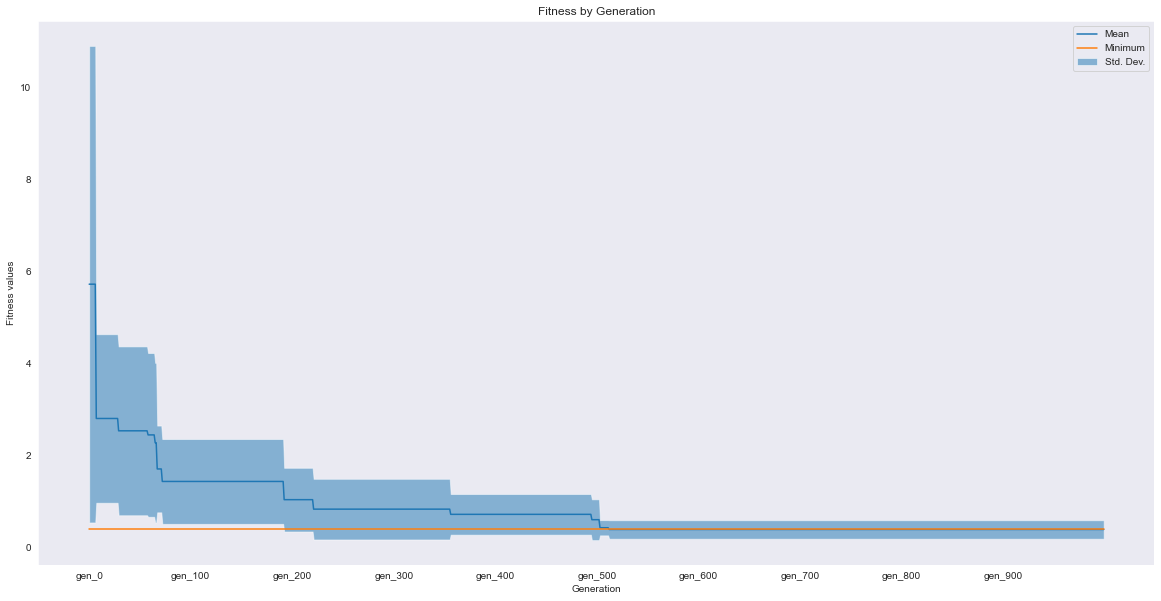

In [70]:
rw.plot_convergence()